In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from collections import Counter

In [2]:
#LEEMOS DATOS BOW
X_tfidf=pd.read_csv("C:/Users/daniela.andaluz/Downloads/X_tfidf.csv")

C:\Users\daniela.andaluz\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\daniela.andaluz\Anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


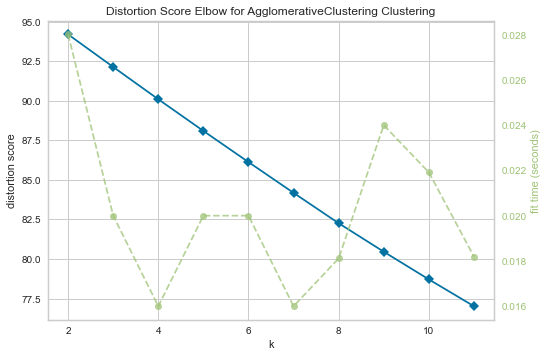

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [3]:
#Elbow method
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(X_tfidf)       
visualizer.show()   


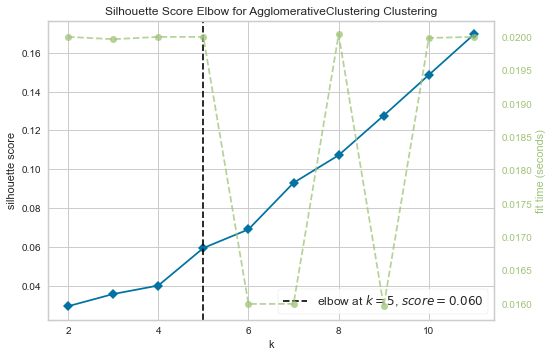

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [4]:
#Silhouette method
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,12),metric='silhouette')
visualizer.fit(X_tfidf)       
visualizer.show()   


In [5]:
#Clusterizamos
from sklearn.cluster import AgglomerativeClustering
AgglomerativeClustering= AgglomerativeClustering(n_clusters =5 )
AgglomerativeClustering_indices = AgglomerativeClustering.fit_predict(X_tfidf)

Text(0.5, 1.0, 'AGNES (k=5), 2 dimensiones')

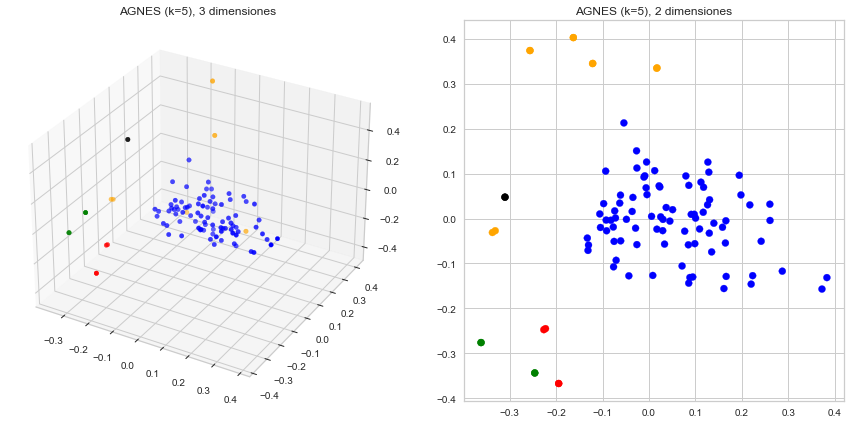

In [6]:
#Compute PCA for visualization
pca = PCA(n_components=3)
scatter_plot_points = pca.fit_transform(X_tfidf)

colors = ['orange','green','red','blue','black']

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
z_axis = [o[2] for o in scatter_plot_points]


plt.figure(figsize =(15,7)) 
G = gridspec.GridSpec(1, 2) 
ax2 = plt.subplot(G[0, 0],projection='3d') 
ax3 = plt.subplot(G[0, 1]) 

ax2.scatter(x_axis, y_axis,z_axis, c=[colors[d] for d in AgglomerativeClustering_indices])
ax2.set_title('AGNES (k=5), 3 dimensiones') 

ax3.scatter(x_axis, y_axis, c=[colors[d] for d in AgglomerativeClustering_indices])
ax3.set_title('AGNES (k=5), 2 dimensiones') 


In [7]:
X=pd.read_csv("C:/Users/daniela.andaluz/Downloads/X_tfidf_index.csv")
X['agnes']=AgglomerativeClustering_indices
X.to_csv("C:/Users/daniela.andaluz/Downloads/X_tfidf_index.csv",index=False)

In [8]:
Counter(AgglomerativeClustering_indices)

Counter({3: 85, 1: 4, 2: 4, 0: 10, 4: 2})